In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bandit import BanditSigmoid, BanditLinear

from reinforcement_learning import (
    streaming_cross_learning,
    streaming_maynard_cross_learning,
    parallel_cross_learning,
    parallel_maynard_cross_learning,
)

from population_simulation import (
    imitaton_of_success,
    weighted_voter_rule,
    run_parallel_simulation_wvr,
    run_parallel_simulation_majority,
    run_parallel_simulation_is,
)

from analytical_solutions import replicator_dynamic
import matplotlib.gridspec as gridspec

plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

plt.rcParams["text.latex.preamble"] = r"\usepackage{lmodern} \usepackage{amsmath}"
# Options
params = {
    "text.usetex": True,
    "font.size": 10,
    "font.family": "lmodern",
    #   'text.latex.unicode': True,
}
plt.rcParams.update(params)

KeyboardInterrupt: 

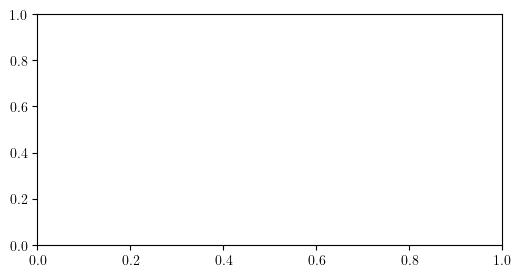

In [2]:
alphas = [0.001, 0.05, 0.01]
# population_sizes = [10, 1000]
seeds = 1000
name = "evenly spaced"


fig, ax = plt.subplots(1, 1, figsize=(6, 3))
colors = ["#1f77b4", "#ff7f0e", "#854d05", "#00008b", "#2ca02c", "#e00e0e"]
i = 0
bandit = BanditLinear(name=name)

steps = int(150 / alphas[0])
for alpha in alphas:

    _, optimal_action_mcl = streaming_maynard_cross_learning(
        bandit=bandit, seeds=seeds, alpha=alpha, steps=steps, alpha_baseline=0.01
    )

    ax.plot(
        range(steps),
        optimal_action_mcl.mean(axis=1) * 100,
        label=f"{alpha}-MCL",
        color=colors[i],
        alpha=0.7,
        linewidth=3,
    )

    i += 1


# simulate MRD
steps_pmcl = 1500
_, optimal_action_pmcl = parallel_maynard_cross_learning(
    steps=steps_pmcl, seeds=seeds, bandit=bandit, parallel_envs=int(1 / alphas[0])
)

optimal_action_pmcl_mean = optimal_action_pmcl.mean(axis=1)
extend = np.full(steps - steps_pmcl, optimal_action_pmcl_mean[-1])
optimal_action_pmcl_mean = np.concatenate((optimal_action_pmcl_mean, extend))


ax.plot(
    range(steps),
    optimal_action_pmcl_mean * 100,
    label=r"$R_{\text{wvoter}}$",
    color=colors[-1],
    linewidth=3,
    alpha=0.5,
)

ax.set_ylabel(r"Average $\%$ optimal action", fontsize=10)
ax.set_xlabel("Steps", fontsize=10)
ax.set_yticks([i for i in np.arange(20, 120, 20)])
ax.set_yticklabels([f"{i}" for i in np.arange(20, 120, 20)], fontsize=10)
# ax.set_xscale("log")
ax.legend(loc="lower right", fontsize=10, ncols=2)

plt.savefig(f"MCL_with_many_alphas.pdf", bbox_inches="tight", dpi=900)

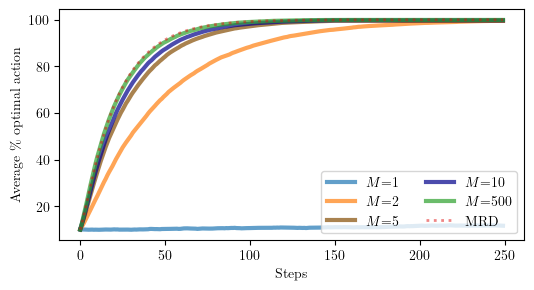

In [2]:
nei_sizes = [1, 2, 5, 10, 500]
# population_sizes = [10, 1000]
seeds = 1000
name = "evenly spaced"
disjoint_neighbourhood = False
use_neighbourhood = True
device = "cpu"
n_proc = 20
population_size = 500
bandit = BanditLinear(name=name)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
colors = ["#1f77b4", "#ff7f0e", "#854d05", "#00008b", "#2ca02c", "#e00e0e"]

i = 0
for nei_size in nei_sizes:

    if (nei_size == 5) or (nei_size == 10) or (nei_size == 500):
        steps = 150
    
    else: 
        steps = 250
    
    # if (nei_size == 1000):
    #     use_neighbourhood = False

    _, optimal_action_wvr = run_parallel_simulation_wvr(
    steps=steps,
    population_size=population_size,
    seeds=seeds,
    neighbourhood_size=nei_size,
    disjoint_neighbourhood=disjoint_neighbourhood,
    use_neighbourhood=use_neighbourhood,
    name=name,
    n_proc=n_proc,
    device=device,
    )

    optimal_action_wvr = optimal_action_wvr.mean(axis=0)
    if steps < 250:
        extend = np.full(250 - 150, optimal_action_wvr[-1])
        optimal_action_wvr = np.concatenate((optimal_action_wvr, extend))

    # ax.fill_between(
    #     range(steps),
    #     optimal_action_wvr.mean(axis=0) * 100 - optimal_action_wvr.std(axis=0) * 100,
    #     optimal_action_wvr.mean(axis=0) * 100 + optimal_action_wvr.std(axis=0) * 100,
    #     color=colors[i],
    #     alpha=0.2,
    # )

    ax.plot(
        range(250),
        optimal_action_wvr * 100,
        label=r"$M$" + f"={nei_size}",
        color=colors[i],
        alpha=0.7,
        linewidth=3,
    )

    i += 1

mean_rewards_mrd, optimal_action_mrd = replicator_dynamic(
    delta=1, bandit=bandit, steps=250, trd=False
)

ax.plot(
    range(250),
    optimal_action_mrd * 100,
    label=r"MRD",
    color=colors[-1],
    linestyle="dotted",
    linewidth=2,
    alpha=0.5,
)

ax.set_ylabel(r"Average $\%$ optimal action", fontsize=10)
ax.set_xlabel("Steps", fontsize=10)
ax.set_yticks([i for i in np.arange(20, 120, 20)])
ax.set_yticklabels([f"{i}" for i in np.arange(20, 120, 20)], fontsize=10)
# ax.set_xscale("log")
ax.legend(loc="lower right", fontsize=10, ncols=2)
plt.savefig(f"wvr_with_many_nei_sizes.pdf", bbox_inches="tight", dpi=900)

running population size 10
running population size 20
running population size 50
running population size 100
running population size 500


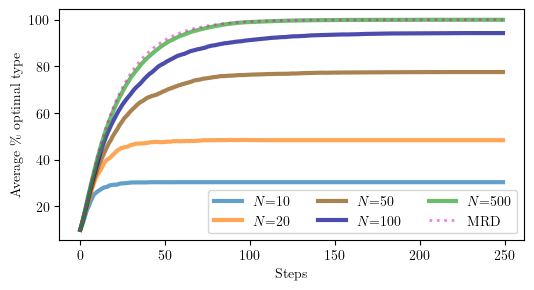

In [2]:
population_sizes = [10, 20, 50, 100, 500]
# population_sizes = [10, 1000]
steps = 250
seeds = 1000
name = "evenly spaced"
disjoint_neighbourhood = False
use_neighbourhood = True
device = "cpu"
n_proc = 20
bandit = BanditLinear(name=name)


fig, ax = plt.subplots(1, 1, figsize=(6, 3))
colors = ["#1f77b4", "#ff7f0e", "#854d05", "#00008b", "#2ca02c", "#e00e0e", "#e00ebd"]
i = 0


for population_size in population_sizes:
    print(f"running population size {population_size}")
    nei_size = population_size
    _, optimal_action_wvr = run_parallel_simulation_wvr(
        steps=steps,
        population_size=population_size,
        seeds=seeds,
        neighbourhood_size=nei_size,
        disjoint_neighbourhood=disjoint_neighbourhood,
        use_neighbourhood=use_neighbourhood,
        name=name,
        n_proc=n_proc,
        device=device,
    )

    ax.plot(
        range(steps),
        optimal_action_wvr.mean(axis=0) * 100,
        label=r"$N$" f"={population_size}",
        color=colors[i],
        alpha=0.7,
        linewidth=3,
    )

    # ax.fill_between(
    #     range(steps),
    #     optimal_action_wvr.mean(axis=0) * 100 - optimal_action_wvr.std(axis=0) * 100,
    #     optimal_action_wvr.mean(axis=0) * 100 + optimal_action_wvr.std(axis=0) * 100,
    #     color=colors[i],
    #     alpha=0.2,
    # )

    i += 1

# simulate MRD
mean_rewards_mrd, optimal_population_mrd = replicator_dynamic(
    1, bandit, steps, trd=False
)
ax.plot(
    range(steps),
    optimal_population_mrd * 100,
    label="MRD",
    color=colors[-1],
    linestyle="dotted",
    linewidth=2,
    alpha=0.5,
)

ax.set_ylabel(r"Average $\%$ optimal type", fontsize=10)
ax.set_xlabel("Steps", fontsize=10)
ax.set_yticks([i for i in np.arange(20, 120, 20)])
ax.set_yticklabels([f"{i}" for i in np.arange(20, 120, 20)], fontsize=10)
ax.legend(loc="lower right", fontsize=10, ncols=3)

plt.savefig(f"R_wvoter_scenario_evenly_spaced.pdf", bbox_inches="tight", dpi=900)

running population size 10
running population size 20
running population size 50
running population size 100
running population size 1000


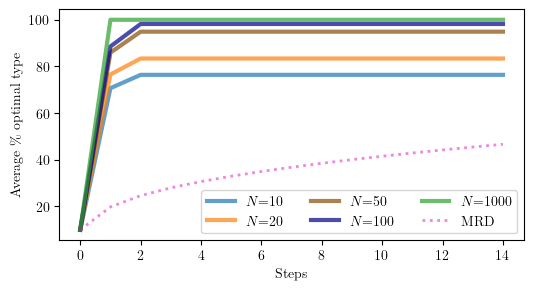

In [ ]:
population_sizes = [10, 20, 50, 100, 1000]
# population_sizes = [10, 1000]
steps = 15
seeds = 1000
name = "evenly spaced"
disjoint_neighbourhood = False
use_neighbourhood = True
device = "cpu"
n_proc = 20
bandit = BanditLinear(name=name)


fig, ax = plt.subplots(1, 1, figsize=(6, 3))
colors = ["#1f77b4", "#ff7f0e", "#854d05", "#00008b", "#2ca02c", "#e00e0e", "#e00ebd"]
i = 0


for population_size in population_sizes:
    print(f"running population size {population_size}")
    nei_size = population_size
    _, optimal_action_wvr = run_parallel_simulation_majority(
        steps=steps,
        population_size=population_size,
        seeds=seeds,
        neighbourhood_size=nei_size,
        disjoint_neighbourhood=disjoint_neighbourhood,
        use_neighbourhood=use_neighbourhood,
        name=name,
        n_proc=n_proc,
        device=device,
    )

    ax.plot(
        range(steps),
        optimal_action_wvr.mean(axis=0) * 100,
        label=r"$N$" f"={population_size}",
        color=colors[i],
        alpha=0.7,
        linewidth=3,
    )

    # ax.fill_between(
    #     range(steps),
    #     optimal_action_wvr.mean(axis=0) * 100 - optimal_action_wvr.std(axis=0) * 100,
    #     optimal_action_wvr.mean(axis=0) * 100 + optimal_action_wvr.std(axis=0) * 100,
    #     color=colors[i],
    #     alpha=0.2,
    # )

    i += 1

# simulate MRD
mean_rewards_mrd, optimal_population_mrd = replicator_dynamic(
    1, bandit, steps, trd=False
)
ax.plot(
    range(steps),
    optimal_population_mrd * 100,
    label="MRD",
    color=colors[-1],
    linestyle="dotted",
    linewidth=2,
    alpha=0.5,
)

ax.set_ylabel(r"Average $\%$ optimal type", fontsize=10)
ax.set_xlabel("Steps", fontsize=10)
ax.set_yticks([i for i in np.arange(20, 120, 20)])
ax.set_yticklabels([f"{i}" for i in np.arange(20, 120, 20)], fontsize=10)
ax.legend(loc="lower right", fontsize=10, ncols=3)

plt.savefig(
    f"Majority_population_scenario_evenly_spaced.pdf", bbox_inches="tight", dpi=900
)

nei size: 2
Seed 1 did not converge to a single type forpopulation size 500: Policy vector: tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0040,
        0.9960])
Seed 5 did not converge to a single type forpopulation size 500: Policy vector: tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0020,
        0.9980])
Seed 5 did not converge to a single type forpopulation size 500: Policy vector: tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0080,
        0.9920])
Seed 7 did not converge to a single type forpopulation size 500: Policy vector: tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0040,
        0.9960])
Seed 6 did not converge to a single type forpopulation size 500: Policy vector: tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0100,
        0.9900])
Seed 7 did not converge to a single type forpopulation size 500: Policy vector: tensor([0.0000, 0.0000,

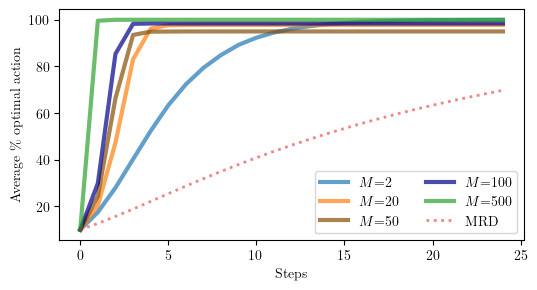

In [ ]:
nei_sizes = [2, 10, 50, 100, 500]
# population_sizes = [10, 1000]
seeds = 500
name = "evenly spaced"
disjoint_neighbourhood = False
use_neighbourhood = True
device = "cpu"
n_proc = 10
population_size = 500
steps = 25
bandit = BanditLinear(name=name)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
colors = ["#1f77b4", "#ff7f0e", "#854d05", "#00008b", "#2ca02c", "#e00e0e"]

i = 0
for nei_size in nei_sizes:
    print(f"nei size: {nei_size}")
    _, optimal_action_wvr = run_parallel_simulation_majority(
        steps=steps,
        population_size=population_size,
        seeds=seeds,
        neighbourhood_size=nei_size,
        disjoint_neighbourhood=disjoint_neighbourhood,
        use_neighbourhood=use_neighbourhood,
        name=name,
        n_proc=n_proc,
        device=device,
    )

    ax.plot(
        range(steps),
        optimal_action_wvr.mean(axis=0) * 100,
        label=r"$M$" + f"={nei_size}",
        color=colors[i],
        alpha=0.7,
        linewidth=3,
    )

    i += 1

mean_rewards_mrd, optimal_action_mrd = replicator_dynamic(
    delta=1, bandit=bandit, steps=steps, trd=False
)

ax.plot(
    range(steps),
    optimal_action_mrd * 100,
    label=r"MRD",
    color=colors[-1],
    linestyle="dotted",
    linewidth=2,
    alpha=0.5,
)

ax.set_ylabel(r"Average $\%$ optimal action", fontsize=10)
ax.set_xlabel("Steps", fontsize=10)
ax.set_yticks([i for i in np.arange(20, 120, 20)])
ax.set_yticklabels([f"{i}" for i in np.arange(20, 120, 20)], fontsize=10)
# ax.set_xscale("log")
ax.legend(loc="lower right", fontsize=10, ncols=2)
plt.savefig(f"majority_with_many_nei_sizes.pdf", bbox_inches="tight", dpi=900)

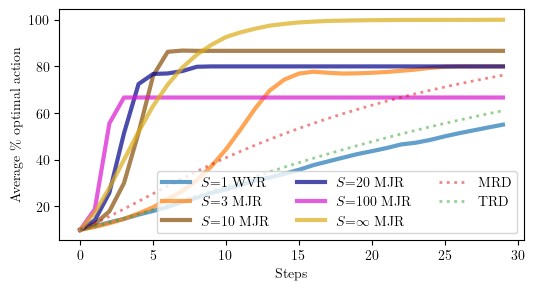

In [3]:
votes = [1, 3, 10, 20, 100, 1000000]
iterations = 15
name = "evenly spaced"
disjoint_neighbourhood = False
nei_size = 2
use_neighbourhood = True
device = "cpu"
n_proc = 15
population_size = 4000
steps = 30
stop_if_end = True
bandit = BanditLinear(name=name)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#854d05",
    "#00008b",
    "#da16d0",
    "#daac16",
    "#8216da",
    "#2ca02c",
    "#e00e0e",
]

i = 0
for vote in votes:
    _, optimal_action_mjr = run_parallel_simulation_majority(
        steps=steps,
        population_size=population_size,
        iterations=iterations,
        neighbourhood_size=nei_size,
        disjoint_neighbourhood=disjoint_neighbourhood,
        number_of_votes=vote,
        use_neighbourhood=use_neighbourhood,
        name=name,
        n_proc=n_proc,
        device=device,
        stop_if_end=stop_if_end,
    )

    if vote == 1:
        label = r"$S$" + f"={vote}" + " WVR"

    if vote > 1 and vote <= 100:
        label = r"$S$" + f"={vote}" + " MJR"

    if vote == 1000000:
        label = r"$S$" + r"=$\infty$" + " MJR"

    ax.plot(
        range(steps),
        optimal_action_mjr.mean(axis=0) * 100,
        label=label,
        color=colors[i],
        alpha=0.7,
        linewidth=3,
    )

    i += 1

mean_rewards_mrd, optimal_action_mrd = replicator_dynamic(
    delta=1, bandit=bandit, steps=steps, trd=False
)

mean_rewards_trd, optimal_action_trd = replicator_dynamic(
    delta=1, bandit=bandit, steps=steps, trd=True
)

ax.plot(
    range(steps),
    optimal_action_mrd * 100,
    label=r"MRD",
    color=colors[-1],
    linestyle="dotted",
    linewidth=2,
    alpha=0.5,
)

ax.plot(
    range(steps),
    optimal_action_trd * 100,
    label=r"TRD",
    color=colors[-2],
    linestyle="dotted",
    linewidth=2,
    alpha=0.5,
)

ax.set_ylabel(r"Average $\%$ optimal action", fontsize=10)
ax.set_xlabel("Steps", fontsize=10)
ax.set_yticks([i for i in np.arange(20, 120, 20)])
ax.set_yticklabels([f"{i}" for i in np.arange(20, 120, 20)], fontsize=10)
# ax.set_xscale("log")
ax.legend(loc="lower right", fontsize=10, ncols=3)
plt.savefig(f"majority_rule.pdf", bbox_inches="tight", dpi=900)

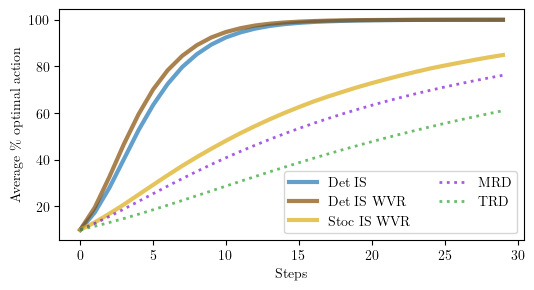

In [4]:
steps = 30
population_size = 1000
iterations = 1000
neighbourhood_size = 1000
disjoint_neighbourhood = False
use_neighbourhood = True
n_proc = 20
name = "evenly spaced"
device = "cpu"
bandit = BanditLinear(name=name, device=device)
stop_if_end = True

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#854d05",
    "#00008b",
    "#da16d0",
    "#daac16",
    "#8216da",
    "#2ca02c",
    "#e00e0e",
]

_, optimal_action_mrd = replicator_dynamic(
    delta=1, bandit=bandit, steps=steps, trd=False
)

_, optimal_action_trd = replicator_dynamic(
    delta=1, bandit=bandit, steps=steps, trd=True
)

_, optimal_action_wvr_is_det = run_parallel_simulation_wvr(
    n_proc=n_proc,
    steps=steps,
    population_size=population_size,
    iterations=iterations,
    disjoint_neighbourhood=disjoint_neighbourhood,
    use_neighbourhood=use_neighbourhood,
    neighbourhood_size=neighbourhood_size,
    device=device,
    name=name,
    switch="is_det",
    stop_if_end=stop_if_end,
)

_, optimal_action_wvr_is_stoc = run_parallel_simulation_wvr(
    n_proc=n_proc,
    steps=steps,
    population_size=population_size,
    iterations=iterations,
    disjoint_neighbourhood=disjoint_neighbourhood,
    use_neighbourhood=use_neighbourhood,
    neighbourhood_size=neighbourhood_size,
    device=device,
    name=name,
    switch="is_stoc",
    stop_if_end=stop_if_end,
)

_, optimal_action_is_det = run_parallel_simulation_is(
    steps=steps,
    population_size=population_size,
    iterations=iterations,
    name=name,
    n_proc=n_proc,
    device=device,
    deterministic=True,
    stop_if_end=stop_if_end,
)


ax.plot(
    range(steps),
    optimal_action_is_det.mean(axis=0) * 100,
    label="Det IS",
    linewidth=3,
    color=colors[0],
    alpha=0.7,
)

ax.plot(
    range(steps),
    optimal_action_wvr_is_det.mean(axis=0) * 100,
    label="Det IS WVR",
    color=colors[2],
    linewidth=3,
    alpha=0.7,
)

ax.plot(
    range(steps),
    optimal_action_wvr_is_stoc.mean(axis=0) * 100,
    label="Stoc IS WVR",
    color=colors[5],
    linewidth=3,
    alpha=0.7,
)


ax.plot(
    range(steps),
    optimal_action_mrd * 100,
    label="MRD",
    linestyle="dotted",
    color=colors[6],
    linewidth=2,
    alpha=0.7,
)

ax.plot(
    range(steps),
    optimal_action_trd * 100,
    label="TRD",
    linestyle="dotted",
    color=colors[7],
    linewidth=2,
    alpha=0.7,
)

ax.set_ylabel(r"Average $\%$ optimal action", fontsize=10)
ax.set_xlabel("Steps", fontsize=10)
ax.set_yticks([i for i in np.arange(20, 120, 20)])
ax.set_yticklabels([f"{i}" for i in np.arange(20, 120, 20)], fontsize=10)
ax.legend(loc="lower right", fontsize=10, ncols=2)
plt.savefig(f"frankstein_bee.pdf", bbox_inches="tight", dpi=900)